In [25]:
from __future__ import print_function

import numpy as np
import pandas as pd

import thinkplot
import thinkstats2

%matplotlib inline

<h1 >Part 2: Data Analysis</h1>

In [56]:
data = pd.read_csv('Teams.csv',encoding="ISO-8859-1", delimiter=";") #read database

w = data.W #wins
hra = data. HRA #homeruns allowed


<h1 >PART 3: Histogram , PMF, CDF </h1>

In [57]:
min(data.W), max(data.W), min(data.HRA), max(data.HRA)

(0, 116, 0, 258)

In [74]:
w = data.W
hra = data.HRA

print ('Mean of W: ' + str(w.mean()))
print ('Variance of W: ' + str(w.var()))
print ('Standard Deviation of W: ' + str(w.std()))
print ()
print ('Mean of HRA: ' + str(hra.mean()) )
print ('Variance of HRA: ' + str(hra.var()))
print ('Standard Deviation of HRA:' + str(hra.std()))

Mean of W: 74.81410934744268
Variance of W: 309.45061242981785
Standard Deviation of W: 17.591208384582846

Mean of HRA: 102.04514991181658
Variance of HRA: 3439.676859848728
Standard Deviation of HRA:58.64875838283985


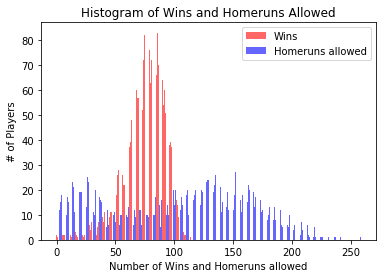

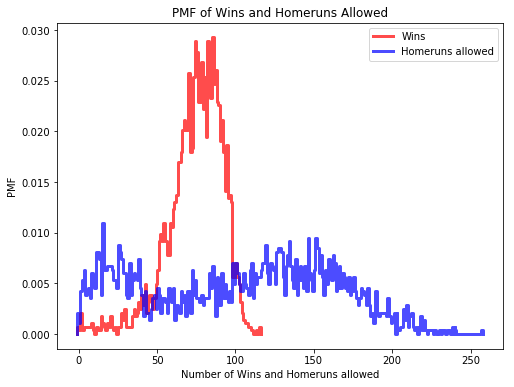

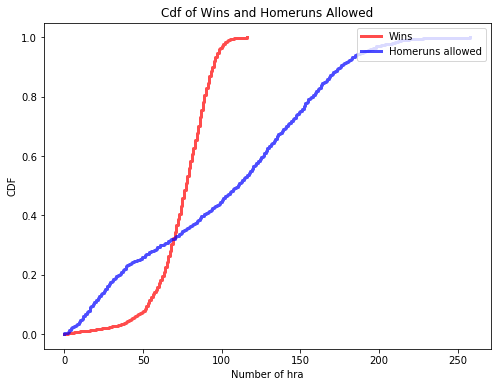

In [51]:
histogram_of_wins =thinkstats2.Hist(w,label="Wins")
histogram_of_hra = thinkstats2.Hist(hra,label="Homeruns allowed")
thinkplot.Hist(histogram_of_wins, color='Red',  width=0.45,align='right')
thinkplot.Hist(histogram_of_hra, color='Blue',  width=0.45, align='left') 
thinkplot.Show(xlabel='Number of Wins and Homeruns allowed', ylabel='# of Players' , loc='upper right',title='Histogram of Wins and Homeruns Allowed')

histogram_wins_pmf = thinkstats2.Pmf(w,label="Wins")
histogram_hra_pmf = thinkstats2.Pmf(hra,label="Homeruns allowed")
thinkplot.PrePlot(2)
thinkplot.Pmf(histogram_wins_pmf, color='Red', align='right')
thinkplot.Pmf(histogram_hra_pmf, color='Blue', align='right') 
thinkplot.Show(xlabel='Number of Wins and Homeruns allowed', ylabel='PMF',loc='upper right',title='PMF of Wins and Homeruns Allowed')

histogram_wins_cdf= thinkstats2.Cdf(w)
histogram_hra_cdf = thinkstats2.Cdf(hra)
thinkplot.Cdf(histogram_wins_cdf, color='Red',label="Wins")
thinkplot.Cdf(histogram_, color='Blue',label="Homeruns allowed") 
thinkplot.Show(xlabel='Number of hra', ylabel='CDF',loc='upper right',title='Cdf of Wins and Homeruns Allowed')

<h1 >Part 4: Modelling Distribution</h1>

mean: 74.81410934744268 std: 17.591208384582846
median: 127.587734501


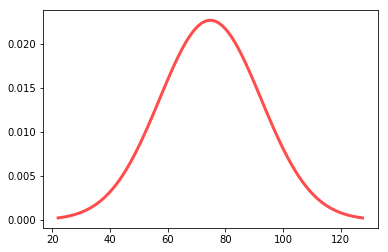

In [96]:
mean, std = w.mean(), w.std()

print ('mean: ' + str(mean) + ' std: ' + str(std))

pdf = thinkstats2.NormalPdf(mean, std)

def Median(s):
    cdf = thinkstats2.Cdf(s)
    return cdf.Value(1)

median = Median(pdf)
print ('median: ' + str(median))

thinkplot.Pdf(pdf, label='Normal Pdf Distribution of Wins', color='red')

<h1 >Part 5: Correlation</h1>

[[ 1.          0.31970224]
 [ 0.31970224  1.        ]]


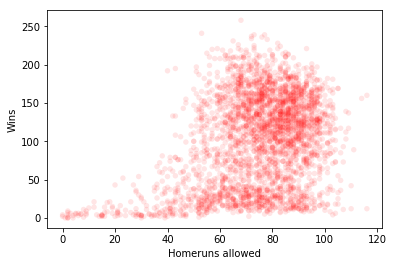

In [77]:
print (np.corrcoef(data.W,data.HRA))

thinkplot.Scatter(data.W, data.HRA, alpha=0.1,color='red') 
thinkplot.Config(xlabel='Homeruns allowed',
                 ylabel='Wins',                 
                 legend=False)

<h1 >Part 6 : Hypothesis Testing</h1>

In [82]:
class HT(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    

In [95]:
data = w.values, hra.values
ht = HT(data)
pvalue = ht.PValue()
print ('p-value: ' + str(pvalue))

p-value: 0.0
